In [1]:
print("hello world")

hello world


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd

In [7]:
df = pd.read_csv('/sub-division_population_of_pakistan.csv')


In [8]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),...,POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,...,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,...,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,...,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,...,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,...,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows to understand the structure of the data
print(df.head())

# Basic information about the dataset
print(df.info())



  PROVINCE             DIVISION               DISTRICT         SUB DIVISION  \
0   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT  BAHAWALNAGAR TEHSIL   
1   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT     CHISHTIAN TEHSIL   
2   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    FORT ABBAS TEHSIL   
3   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    HAROONABAD TEHSIL   
4   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT   MINCHINABAD TEHSIL   

   AREA (sq.km)  ALL SEXES (RURAL)  MALE (RURAL)  FEMALE (RURAL)  \
0        1729.0             619550        316864          302644   
1        1500.0             540342        273788          266500   
2        2536.0             361240        182655          178541   
3        1295.0             382115        192278          189808   
4        1818.0             452723        231506          221178   

   TRANSGENDER (RURAL)  SEX RATIO (RURAL)  ...  ALL SEXES (URBAN)  \
0                   42             104.70  ... 

  PROVINCE             DIVISION               DISTRICT         SUB DIVISION  \
0   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT  BAHAWALNAGAR TEHSIL   
1   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT     CHISHTIAN TEHSIL   
2   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    FORT ABBAS TEHSIL   
3   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT    HAROONABAD TEHSIL   
4   PUNJAB  BAHAWALPUR DIVISION  BAHAWALNAGAR DISTRICT   MINCHINABAD TEHSIL   

   AREA (sq.km)  ALL SEXES (RURAL)  MALE (RURAL)  FEMALE (RURAL)  \
0        1729.0             619550        316864          302644   
1        1500.0             540342        273788          266500   
2        2536.0             361240        182655          178541   
3        1295.0             382115        192278          189808   
4        1818.0             452723        231506          221178   

   TRANSGENDER (RURAL)  SEX RATIO (RURAL)  ...  ALL SEXES (URBAN)  \
0                   42             104.70  ... 

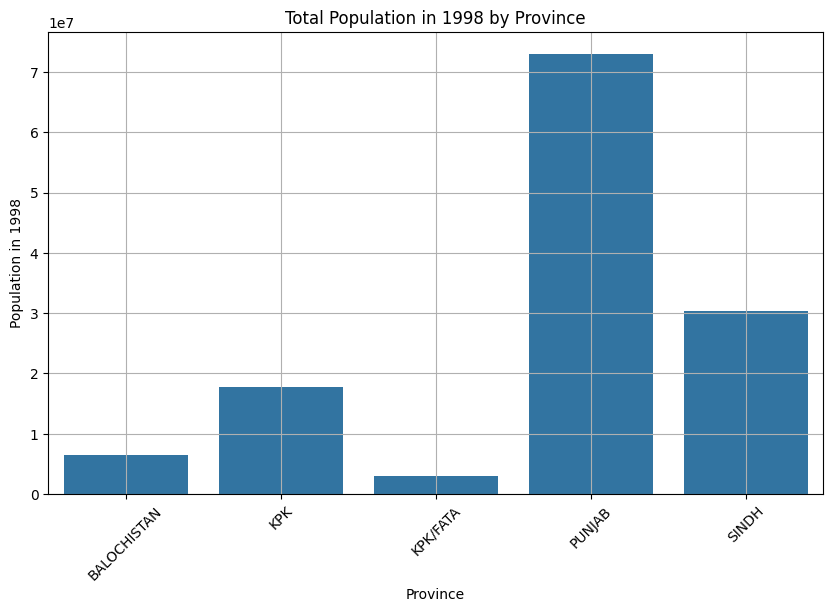

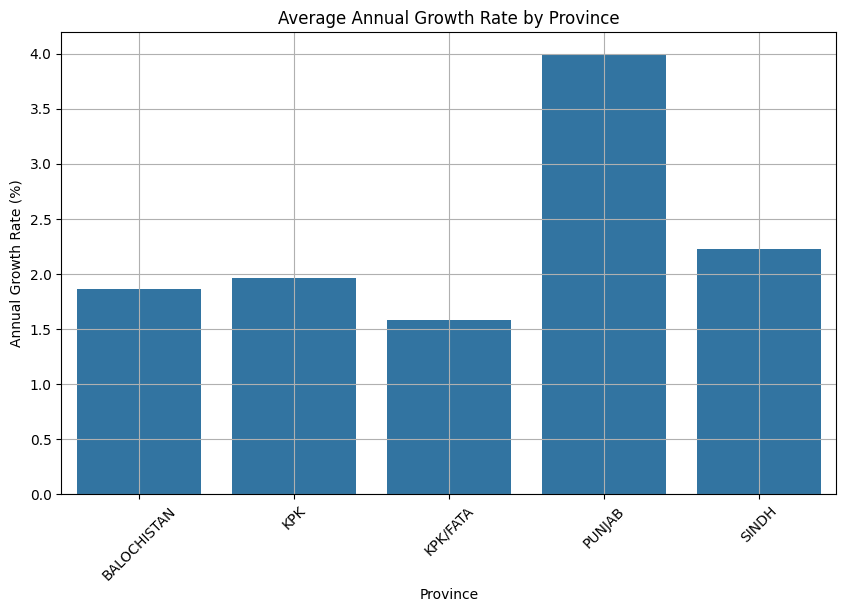

In [15]:
print(df.head())

# Summing rural and urban population to get the total population for each division

df['Total_Population_1998'] = df['POPULATION 1998 (RURAL)'] + df['POPULATION 1998 (URBAN)']

df['Total_Annual_Growth_Rate'] = (df['ANNUAL GROWTH RATE (RURAL)'] + df['ANNUAL GROWTH RATE (URBAN)']) / 2

# Group the data by Province
df_grouped = df.groupby('PROVINCE').agg({
    'Total_Population_1998': 'sum',
    'Total_Annual_Growth_Rate': 'mean'
}).reset_index()

# Display the grouped data
print(df_grouped)

# Visualizing total population by province
plt.figure(figsize=(10, 6))
sns.barplot(x='PROVINCE', y='Total_Population_1998', data=df_grouped)
plt.title('Total Population in 1998 by Province')
plt.xlabel('Province')
plt.ylabel('Population in 1998')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualizing average annual growth rate by province
plt.figure(figsize=(10, 6))
sns.barplot(x='PROVINCE', y='Total_Annual_Growth_Rate', data=df_grouped)
plt.title('Average Annual Growth Rate by Province')
plt.xlabel('Province')
plt.ylabel('Annual Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()